In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import colors

%matplotlib widget

In [2]:
neighborhood = ((-1,-1), (-1,0), (-1,1), (0,-1), (0, 1), (1,-1), (1,0), (1,1))

EMPTY, TREE, FIRE, WATER = 0, 1, 2, 3
colors_list = [(0.2,0,0), (0,0.5,0), (1,0.3,0.1), 'orange', 'blue']
cmap = colors.ListedColormap(colors_list)
bounds = [0,1,2,3,4]
norm = colors.BoundaryNorm(bounds, cmap.N)

In [3]:
def rules(X):    
	X1 = np.zeros((ny, nx))    
	for ix in range(1,nx-1):         
		for iy in range(1,ny-1):            
			if X[iy,ix] == WATER:                 
				X1[iy,ix] = WATER            
			if X[iy,ix] == EMPTY and np.random.random() <= tree_growth:                 
				X1[iy,ix] = TREE            
			if X[iy,ix] == TREE:                 
				X1[iy,ix] = TREE                                  
				for dx,dy in neighborhood:                     
					if X[iy+dy,ix+dx] == FIRE:                         
						X1[iy,ix] = FIRE                         
						break                 
				else:                     
					if np.random.random() <= lightning_strike:                         
						X1[iy,ix] = FIRE         
	return X1

In [4]:
forest_fraction = 0.2

tree_growth, lightning_strike = 0.05, 0.001

nx, ny = 100, 100

X = np.zeros((ny, nx))

X[1:ny-1, 1:nx-1] = np.random.randint(0, 2, size=(ny-2, nx-2))
X[1:ny-1, 1:nx-1] = np.random.random(size=(ny-2, nx-2)) < forest_fraction

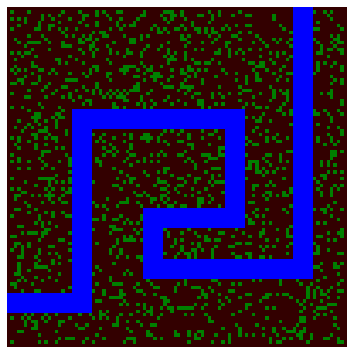

In [5]:
fig = plt.figure(figsize=(25/3, 6.25))
ax = fig.add_subplot(111)
ax.set_axis_off()

X[84:90, 0:25] = WATER
X[30:90, 19:25] = WATER
X[30:36, 19:70] = WATER
X[30:65, 64:70] = WATER
X[59:65, 40:70] = WATER
X[65:80, 40:46] = WATER
X[74:80, 46:90] = WATER
X[0:80, 84:90] = WATER


im = ax.imshow(X, cmap=cmap, norm=norm)

def animate(i):
     im.set_data(animate.X)
     animate.X = rules(animate.X)


animate.X = X

interval = 100
anim = animation.FuncAnimation(fig, animate, interval=interval)

plt.show()

In [6]:
anim.event_source.stop()

In [7]:
# writervideo = animation.FFMpegWriter() 
# anim.save('C://Users//ajord/Downloads//forest_fire_barrier.mp4',writer=writervideo)